#### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataframe 1: Flight_BaggageULD_Details_Sep-Nov.xlsx
df1 = pd.read_excel('Flight_BaggageULD_Details_Sep-Nov.xlsx', sheet_name='in')

In [3]:
display(df1.head())

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time
0,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930
1,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE29231SQ,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930
2,﻿SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE28054SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933
3,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE87419SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933
4,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE80186SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73818 entries, 0 to 73817
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Flight No      73818 non-null  object        
 1   Flight Date    73817 non-null  datetime64[ns]
 2   In-bound Time  73745 non-null  datetime64[ns]
 3   Trip Number    73817 non-null  float64       
 4   ULD Number     73817 non-null  object        
 5   Pickup Time    26826 non-null  datetime64[ns]
 6   Dropoff Time   27115 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), object(2)
memory usage: 3.9+ MB


#### Remove spaces in column names

In [5]:
# Remove space in column names
df1.columns = df1.columns.str.replace(' ', '')

#### Remove unnecessary text in Flight

In [6]:
# Flight Number must be string
df1['FlightNo'] = df1['FlightNo'].astype(str)
# remove special characters in Flight Number
df1['FlightNo'] = df1['FlightNo'].str.replace('[^0-9a-zA-Z]+', '')
df1.head()

,FlightNo,FlightDate,In-boundTime,TripNumber,ULDNumber,PickupTime,DropoffTime
0,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930
1,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE29231SQ,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930
2,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE28054SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933
3,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE87419SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933
4,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE80186SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933


#### New Column with Total Trips

In [7]:
# Make a new column of trip number based on a particular flight number and flight date
df1['Total_trips'] = df1.groupby(['FlightNo', 'FlightDate']).TripNumber.transform('count')
df1.head()

,FlightNo,FlightDate,In-boundTime,TripNumber,ULDNumber,PickupTime,DropoffTime,Total_trips
0,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,12.0
1,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE29231SQ,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930,12.0
2,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE28054SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,12.0
3,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE87419SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,12.0
4,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE80186SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,12.0


#### New Column with Total ULD's

In [8]:
# Make a new column of trip number based on a particular flight number and flight date
df1['Total_ULDs'] = df1.groupby(['FlightNo', 'FlightDate']).ULDNumber.transform('count')
df1.head()

,FlightNo,FlightDate,In-boundTime,TripNumber,ULDNumber,PickupTime,DropoffTime,Total_trips,Total_ULDs
0,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,12.0,12.0
1,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE29231SQ,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930,12.0,12.0
2,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE28054SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,12.0,12.0
3,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE87419SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,12.0,12.0
4,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE80186SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,12.0,12.0


#### Delete date in pickup and dropoff time


In [9]:
# delete date in pickup time column using dt 
# df1['PickupTime'] = df1['PickupTime'].dt.strftime('%H:%M:%S') # %p for AM/PM
# df1['DropoffTime'] = df1['DropoffTime'].dt.strftime('%H:%M:%S') # %p for AM/PM
# df1.head()

#### Make new column for all ULDs and drop duplicates

In [10]:
# Combine all ULDS against a particular flight in one column
df1['ULDs'] = df1.groupby(['FlightNo', 'FlightDate'])['ULDNumber'].transform(lambda x: ','.join(x))
df1 = df1.drop_duplicates(subset=['FlightNo', 'FlightDate','In-boundTime','PickupTime','DropoffTime'])
df1

,FlightNo,FlightDate,In-boundTime,TripNumber,ULDNumber,PickupTime,DropoffTime,Total_trips,Total_ULDs,ULDs
0,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
1,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE29231SQ,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
2,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE28054SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
5,SQ208,2022-09-01,2022-09-01 00:21:00,3.0,AKE70912SQ,NaT,NaT,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
8,SQ208,2022-09-01,2022-09-01 00:21:00,5.0,N,2022-09-01 00:38:19.510,2022-09-01 00:48:19.473,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
...,...,...,...,...,...,...,...,...,...,...
73785,SQ105,2022-10-12,NaT,2.0,AKE11050SQ,NaT,NaT,5.0,5.0,"AKE84181SQ,AKE11050SQ,AKE86081SQ,AKE70384SQ,AK..."
73786,SQ224,2022-10-13,NaT,2.0,AKE84370SQ,2022-10-13 12:06:25.787,NaT,6.0,6.0,"AKE86114SQ,AKE85472SQ,AKE71563SQ,AKE84370SQ,AK..."
73789,TR391,2022-10-13,NaT,2.0,AKE11775TR,2022-10-13 23:38:02.563,2022-10-13 23:39:52.223,5.0,5.0,"AKE11841TR,AKE11775TR,AKE11245TR,AKE88895TR,AK..."
73798,SQ238,2022-09-30,NaT,3.0,AKE70061SQ,2022-09-30 16:09:28.450,2022-09-30 16:09:39.620,9.0,9.0,"AKE11548SQ,AKE28082SQ,N,AKE87334SQ,AKE84125SQ,..."


#### Drop Trip number and ULD Number

In [11]:
# Drop Trip Number column and ULD Number column
df1 = df1.drop(['TripNumber', 'ULDNumber'], axis=1)
df1.head()

,FlightNo,FlightDate,In-boundTime,PickupTime,DropoffTime,Total_trips,Total_ULDs,ULDs
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
1,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
2,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
5,SQ208,2022-09-01,2022-09-01 00:21:00,NaT,NaT,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
8,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:38:19.510,2022-09-01 00:48:19.473,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."


#### Cross check

In [12]:
# Find flight SQ 208 in df1
df1[df1['FlightNo'] == 'SQ208'].head()

,FlightNo,FlightDate,In-boundTime,PickupTime,DropoffTime,Total_trips,Total_ULDs,ULDs
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
1,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
2,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
5,SQ208,2022-09-01,2022-09-01 00:21:00,NaT,NaT,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
8,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:38:19.510,2022-09-01 00:48:19.473,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."


In [13]:
df1.drop(df1.index[1:])

,FlightNo,FlightDate,In-boundTime,PickupTime,DropoffTime,Total_trips,Total_ULDs,ULDs
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."


#### Fill blank with null values

In [14]:
# Change blank spaces in pickup time and dropoff time to NaN
df1['PickupTime'] = df1['PickupTime'].replace(' ', np.nan)
df1['DropoffTime'] = df1['DropoffTime'].replace(' ', np.nan)
df1.head()

,FlightNo,FlightDate,In-boundTime,PickupTime,DropoffTime,Total_trips,Total_ULDs,ULDs
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
1,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
2,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
5,SQ208,2022-09-01,2022-09-01 00:21:00,NaT,NaT,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
8,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:38:19.510,2022-09-01 00:48:19.473,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."


#### First and Last value of the pickup and Dropoff time

In [15]:
# Only First and Last column of the pickup and Dropoff time
df1['Pickup TimeN']=df1.groupby(['FlightNo','FlightDate'])['PickupTime'].transform('first')
df1['Dropoff TimeN']=df1.groupby(['FlightNo','FlightDate'])['DropoffTime'].transform('last')
df1.head()

,FlightNo,FlightDate,In-boundTime,PickupTime,DropoffTime,Total_trips,Total_ULDs,ULDs,Pickup TimeN,Dropoff TimeN
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",2022-09-01 00:33:15.220,2022-09-01 00:48:19.473
1,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",2022-09-01 00:33:15.220,2022-09-01 00:48:19.473
2,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",2022-09-01 00:33:15.220,2022-09-01 00:48:19.473
5,SQ208,2022-09-01,2022-09-01 00:21:00,NaT,NaT,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",2022-09-01 00:33:15.220,2022-09-01 00:48:19.473
8,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:38:19.510,2022-09-01 00:48:19.473,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",2022-09-01 00:33:15.220,2022-09-01 00:48:19.473


In [16]:
# Drop duplicates of Flight Number and Flight Date
df1 = df1.drop_duplicates(subset=['FlightNo', 'FlightDate'])
df1.head()

,FlightNo,FlightDate,In-boundTime,PickupTime,DropoffTime,Total_trips,Total_ULDs,ULDs,Pickup TimeN,Dropoff TimeN
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",2022-09-01 00:33:15.220,2022-09-01 00:48:19.473
12,SQ11,2022-09-01,2022-09-01 00:38:00,NaT,NaT,13.0,13.0,"AKE70581SQ,AKE71569SQ,N,N,AKE81046SQ,AKE88484S...",NaT,NaT
25,SQ242,2022-09-01,2022-09-01 00:40:00,2022-09-01 00:54:23.003,2022-09-01 00:55:44.893,4.0,4.0,"AKE80436SQ,AKE70095SQ,AKE80288SQ,AKE28067SQ",2022-09-01 00:54:23.003,2022-09-01 00:55:44.900
29,TR25,2022-09-01,2022-09-01 03:55:00,2022-09-01 04:17:01.517,2022-09-01 04:22:18.260,11.0,11.0,"AKE84300SQ,AKE88045SQ,AKE11124SQ,AKE85377SQ,AK...",2022-09-01 04:17:01.517,2022-09-01 04:38:25.783
40,TR541,2022-09-01,2022-09-01 04:04:00,NaT,NaT,4.0,4.0,"BT804,BT015,BT1480,BT719",NaT,NaT


In [17]:
# Check SQ 208 in df_result
df1[df1['FlightNo'] == 'SQ208'].head()

,FlightNo,FlightDate,In-boundTime,PickupTime,DropoffTime,Total_trips,Total_ULDs,ULDs,Pickup TimeN,Dropoff TimeN
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",2022-09-01 00:33:15.220,2022-09-01 00:48:19.473
733,SQ208,2022-09-02,2022-09-02 00:34:00,NaT,NaT,14.0,14.0,"AKE88033SQ,AKE87124SQ,AKE82746SQ,AKE70747SQ,AK...",NaT,NaT
1505,SQ208,2022-09-03,2022-09-03 00:11:00,NaT,NaT,15.0,15.0,"AKE70621SQ,AKE70556SQ,AKE71016SQ,AKE88350SQ,AK...",NaT,NaT
2273,SQ208,2022-09-04,2022-09-04 00:32:00,2022-09-04 00:45:23.193,NaT,12.0,12.0,"AKE83607SQ,AKE70476SQ,AKE89044SQ,N,AKE88544SQ,...",2022-09-04 00:45:23.193,NaT
3094,SQ208,2022-09-05,2022-09-05 00:43:00,NaT,NaT,14.0,14.0,"AKE11471SQ,N,AKE28223SQ,AKE88514SQ,N,BT790,AKE...",NaT,NaT


#### Drop Pickup and Dropoff time

In [18]:
# drop pickup time and dropoff time
df1 = df1.drop(['PickupTime', 'DropoffTime'], axis=1)
df1.head()

,FlightNo,FlightDate,In-boundTime,Total_trips,Total_ULDs,ULDs,Pickup TimeN,Dropoff TimeN
0,SQ208,2022-09-01,2022-09-01 00:21:00,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",2022-09-01 00:33:15.220,2022-09-01 00:48:19.473
12,SQ11,2022-09-01,2022-09-01 00:38:00,13.0,13.0,"AKE70581SQ,AKE71569SQ,N,N,AKE81046SQ,AKE88484S...",NaT,NaT
25,SQ242,2022-09-01,2022-09-01 00:40:00,4.0,4.0,"AKE80436SQ,AKE70095SQ,AKE80288SQ,AKE28067SQ",2022-09-01 00:54:23.003,2022-09-01 00:55:44.900
29,TR25,2022-09-01,2022-09-01 03:55:00,11.0,11.0,"AKE84300SQ,AKE88045SQ,AKE11124SQ,AKE85377SQ,AK...",2022-09-01 04:17:01.517,2022-09-01 04:38:25.783
40,TR541,2022-09-01,2022-09-01 04:04:00,4.0,4.0,"BT804,BT015,BT1480,BT719",NaT,NaT


#### Change column position

In [19]:
# Shift ULD column at the end
df1 = df1[['FlightNo', 'FlightDate', 'In-boundTime', 'Pickup TimeN', 'Dropoff TimeN', 'Total_trips', 'Total_ULDs', 'ULDs']]
df1.head()

,FlightNo,FlightDate,In-boundTime,Pickup TimeN,Dropoff TimeN,Total_trips,Total_ULDs,ULDs
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:48:19.473,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK..."
12,SQ11,2022-09-01,2022-09-01 00:38:00,NaT,NaT,13.0,13.0,"AKE70581SQ,AKE71569SQ,N,N,AKE81046SQ,AKE88484S..."
25,SQ242,2022-09-01,2022-09-01 00:40:00,2022-09-01 00:54:23.003,2022-09-01 00:55:44.900,4.0,4.0,"AKE80436SQ,AKE70095SQ,AKE80288SQ,AKE28067SQ"
29,TR25,2022-09-01,2022-09-01 03:55:00,2022-09-01 04:17:01.517,2022-09-01 04:38:25.783,11.0,11.0,"AKE84300SQ,AKE88045SQ,AKE11124SQ,AKE85377SQ,AK..."
40,TR541,2022-09-01,2022-09-01 04:04:00,NaT,NaT,4.0,4.0,"BT804,BT015,BT1480,BT719"


#### Drill down text pre-processing

##### Flight No

In [20]:
# Unique Flight Number in list
df1['FlightNo'].unique()[:10]

array(['SQ208', 'SQ11', 'SQ242', 'TR25', 'TR541', 'SQ623', 'SQ33',
       'SQ635', 'SQ391', 'SQ218'], dtype=object)

In [21]:
# Flights with equals to 5 characters
print('Flight_No equal to 5 characters:','\n',df1[df1['FlightNo'].str.len() == 5].count())
# Flights with more than 5 characters
print('Flight_No with more than 5 characters:','\n',df1[df1['FlightNo'].str.len() > 5].count())
# Flights with less than 5 characters
print('Flight_No with less than 5 characters:','\n',df1[df1['FlightNo'].str.len() < 5].count())

Flight_No equal to 5 characters: 
 FlightNo         7089
FlightDate       7088
In-boundTime     7078
Pickup TimeN     3031
Dropoff TimeN    3448
Total_trips      7088
Total_ULDs       7088
ULDs             7088
dtype: int64
Flight_No with more than 5 characters: 
 FlightNo         17
FlightDate       17
In-boundTime     17
Pickup TimeN      4
Dropoff TimeN     6
Total_trips      17
Total_ULDs       17
ULDs             17
dtype: int64
Flight_No with less than 5 characters: 
 FlightNo         902
FlightDate       902
In-boundTime     902
Pickup TimeN     486
Dropoff TimeN    486
Total_trips      902
Total_ULDs       902
ULDs             902
dtype: int64


In [22]:
# Flights with equal to 1 characters
print('Flight_No equal to  1 character:','\n',df1[df1['FlightNo'].str.len() == 1].count())
# Flights with equal to 2 characters
print('Flight_No equal to  2 character:','\n',df1[df1['FlightNo'].str.len() == 2].count())
# Flights with equal to 3 characters
print('Flight_No equal to  3 character:','\n',df1[df1['FlightNo'].str.len() == 3].count())

Flight_No equal to  1 character: 
 FlightNo         0
FlightDate       0
In-boundTime     0
Pickup TimeN     0
Dropoff TimeN    0
Total_trips      0
Total_ULDs       0
ULDs             0
dtype: int64
Flight_No equal to  2 character: 
 FlightNo         0
FlightDate       0
In-boundTime     0
Pickup TimeN     0
Dropoff TimeN    0
Total_trips      0
Total_ULDs       0
ULDs             0
dtype: int64
Flight_No equal to  3 character: 
 FlightNo         96
FlightDate       96
In-boundTime     96
Pickup TimeN     51
Dropoff TimeN    45
Total_trips      96
Total_ULDs       96
ULDs             96
dtype: int64


##### ULD

In [23]:
# Max and min length of ULD
print('Max ULD count: ',df1['Total_ULDs'].max())
print('Min ULD count: ',df1['Total_ULDs'].min())

# Print dataframe of maximum value ULD
df1[df1['Total_ULDs'] == df1['Total_ULDs'].max()]

Max ULD count:  52.0
Min ULD count:  1.0


,FlightNo,FlightDate,In-boundTime,Pickup TimeN,Dropoff TimeN,Total_trips,Total_ULDs,ULDs
61930,SQ222,2022-11-19,2022-11-19 21:08:00,NaT,NaT,52.0,52.0,"AKE29278SQ,AKE29278SQ,AKE87054SQ,AKE70416SQ,AK..."


Scatter plot

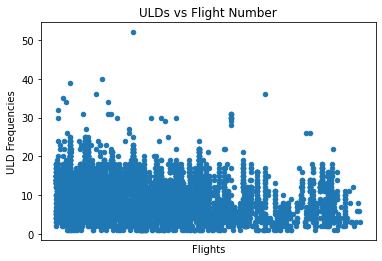

In [24]:
# Show ULD scatter plot with frequencies
df1.plot.scatter(x='FlightNo', y='Total_ULDs', title='ULDs vs Flight Number')
# x and y labels
plt.xlabel('Flights')
plt.ylabel('ULD Frequencies')
# Hide x-ticks 
plt.xticks([])
# Save plot as png
plt.savefig('ULDs vs Flight.png')
# Show plot 
plt.show()

##### Flight Date

In [25]:
# Flight Date where days are greater than 31
print('Flight Date where days are greater than 31','\n',df1[df1['FlightDate'].dt.day > 31].count()) 
# Flight Date where months are greater than 12
print('Flight Date where months are greater than 12','\n',df1[df1['FlightDate'].dt.month > 12].count())

Flight Date where days are greater than 31 
 FlightNo         0
FlightDate       0
In-boundTime     0
Pickup TimeN     0
Dropoff TimeN    0
Total_trips      0
Total_ULDs       0
ULDs             0
dtype: int64
Flight Date where months are greater than 12 
 FlightNo         0
FlightDate       0
In-boundTime     0
Pickup TimeN     0
Dropoff TimeN    0
Total_trips      0
Total_ULDs       0
ULDs             0
dtype: int64


In [26]:
# Flight Date where Year is less than 2022
print('Flight Date where Year is less than 2022','\n',df1[df1['FlightDate'].dt.year < 2022].count())
# Flight Date where Year is greater than 2022
print('Flight Date where Year is greater than 2022','\n',df1[df1['FlightDate'].dt.year > 2022].count())

Flight Date where Year is less than 2022 
 FlightNo         0
FlightDate       0
In-boundTime     0
Pickup TimeN     0
Dropoff TimeN    0
Total_trips      0
Total_ULDs       0
ULDs             0
dtype: int64
Flight Date where Year is greater than 2022 
 FlightNo         0
FlightDate       0
In-boundTime     0
Pickup TimeN     0
Dropoff TimeN    0
Total_trips      0
Total_ULDs       0
ULDs             0
dtype: int64


##### Dropoff TimeN - Pickup TimeN

In [28]:
# difference between pickup time and dropoff time
df1['Time(dropoff-pickup)_minutes'] = (df1['Dropoff TimeN'] - df1['Pickup TimeN'])/ pd.Timedelta(1, unit='m')
df1.head()

,FlightNo,FlightDate,In-boundTime,Pickup TimeN,Dropoff TimeN,Total_trips,Total_ULDs,ULDs,Time(dropoff-pickup)_minutes
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:48:19.473,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",15.070883
12,SQ11,2022-09-01,2022-09-01 00:38:00,NaT,NaT,13.0,13.0,"AKE70581SQ,AKE71569SQ,N,N,AKE81046SQ,AKE88484S...",NaN
25,SQ242,2022-09-01,2022-09-01 00:40:00,2022-09-01 00:54:23.003,2022-09-01 00:55:44.900,4.0,4.0,"AKE80436SQ,AKE70095SQ,AKE80288SQ,AKE28067SQ",1.364950
29,TR25,2022-09-01,2022-09-01 03:55:00,2022-09-01 04:17:01.517,2022-09-01 04:38:25.783,11.0,11.0,"AKE84300SQ,AKE88045SQ,AKE11124SQ,AKE85377SQ,AK...",21.404433
40,TR541,2022-09-01,2022-09-01 04:04:00,NaT,NaT,4.0,4.0,"BT804,BT015,BT1480,BT719",NaN


Max and Min

In [40]:
# max and min time difference between pickup time and dropoff time
print('Max time difference between pickup time and dropoff time: ',df1['Time(dropoff-pickup)_minutes'].max())
print('Min time difference between pickup time and dropoff time: ',df1['Time(dropoff-pickup)_minutes'].min())

Max time difference between pickup time and dropoff time:  92.32745
Min time difference between pickup time and dropoff time:  -31.886733333333332


In [45]:
# Show 5 least time difference between pickup time and dropoff time
df1.nsmallest(5, 'Time(dropoff-pickup)_minutes')

,FlightNo,FlightDate,In-boundTime,Pickup TimeN,Dropoff TimeN,Total_trips,Total_ULDs,ULDs,Time(dropoff-pickup)_minutes,Time(dropoff-inbound)_minutes
55309,TR809,2022-11-12,2022-11-12 14:54:00,2022-11-12 15:41:08.217,2022-11-12 15:09:15.013,10.0,10.0,"AKE87028SQ,AKE85810SQ,AKE88128SQ,AKE11793SQ,AK...",-31.886733,15.250217
38819,SQ238,2022-10-22,2022-10-22 15:32:00,2022-10-22 16:17:59.937,2022-10-22 15:54:39.853,5.0,5.0,"AKE87362SQ,AKE84442SQ,AKE28123SQ,AKE71421SQ,AK...",-23.334733,22.664217
53837,SQ11,2022-11-11,2022-11-11 01:14:00,2022-11-11 01:53:36.027,2022-11-11 01:33:42.883,8.0,8.0,"AKE85401SQ,AKE82396SQ,AKE28200SQ,AKE88466SQ,AK...",-19.885733,19.714717
52029,SQ401,2022-11-08,2022-11-08 17:00:00,2022-11-08 17:34:43.137,2022-11-08 17:16:53.653,19.0,19.0,"AKE88593SQ,AKE85945SQ,N,AKE28032SQ,AKE87001SQ,...",-17.824733,16.894217
73457,SQ319,2022-11-30,2022-11-30 18:48:00,2022-11-30 19:24:06.250,2022-11-30 19:06:55.670,12.0,12.0,"AKE11706SQ,AKE82093SQ,AKE71273SQ,AKE11577SQ,AK...",-17.176333,18.927833


Time less than 1 minute

In [47]:
# Show drop off time - pickup time of less than 1 minute
df1[df1['Time(dropoff-pickup)_minutes'] < 1].count()

FlightNo                         622
FlightDate                       622
In-boundTime                     622
Pickup TimeN                     622
Dropoff TimeN                    622
Total_trips                      622
Total_ULDs                       622
ULDs                             622
Time(dropoff-pickup)_minutes     622
Time(dropoff-inbound)_minutes    622
dtype: int64

Drop all records with less than 1 minute

In [48]:
# Remove all records where drop off time - pickup time is less than 1 minute
df1 = df1[df1['Time(dropoff-pickup)_minutes'] > 1]
df1.head()

,FlightNo,FlightDate,In-boundTime,Pickup TimeN,Dropoff TimeN,Total_trips,Total_ULDs,ULDs,Time(dropoff-pickup)_minutes,Time(dropoff-inbound)_minutes
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:48:19.473,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",15.070883,27.324550
25,SQ242,2022-09-01,2022-09-01 00:40:00,2022-09-01 00:54:23.003,2022-09-01 00:55:44.900,4.0,4.0,"AKE80436SQ,AKE70095SQ,AKE80288SQ,AKE28067SQ",1.364950,15.748333
29,TR25,2022-09-01,2022-09-01 03:55:00,2022-09-01 04:17:01.517,2022-09-01 04:38:25.783,11.0,11.0,"AKE84300SQ,AKE88045SQ,AKE11124SQ,AKE85377SQ,AK...",21.404433,43.429717
54,SQ33,2022-09-01,2022-09-01 04:55:00,2022-09-01 05:08:23.053,2022-09-01 05:10:41.767,11.0,11.0,"AKE70571SQ,AKE82120SQ,AKE28017QS,AKE88462SQ,BT...",2.311900,15.696117
65,SQ635,2022-09-01,2022-09-01 04:56:00,2022-09-01 05:10:00.043,2022-09-01 05:12:32.693,6.0,6.0,"AKE70467SQ,AKE88659SQ,AKE70351SQ,N,AKE28023SQ,...",2.544167,16.544883


##### Dropoff TimeN - InboundTime

In [50]:
# difference between inbound time and dropoff time
df1['Time(dropoff-inbound)_minutes'] = (df1['Dropoff TimeN'] - df1['In-boundTime'])/ pd.Timedelta(1, unit='m')
df1.head()

,FlightNo,FlightDate,In-boundTime,Pickup TimeN,Dropoff TimeN,Total_trips,Total_ULDs,ULDs,Time(dropoff-pickup)_minutes,Time(dropoff-inbound)_minutes
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:48:19.473,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",15.070883,27.324550
25,SQ242,2022-09-01,2022-09-01 00:40:00,2022-09-01 00:54:23.003,2022-09-01 00:55:44.900,4.0,4.0,"AKE80436SQ,AKE70095SQ,AKE80288SQ,AKE28067SQ",1.364950,15.748333
29,TR25,2022-09-01,2022-09-01 03:55:00,2022-09-01 04:17:01.517,2022-09-01 04:38:25.783,11.0,11.0,"AKE84300SQ,AKE88045SQ,AKE11124SQ,AKE85377SQ,AK...",21.404433,43.429717
54,SQ33,2022-09-01,2022-09-01 04:55:00,2022-09-01 05:08:23.053,2022-09-01 05:10:41.767,11.0,11.0,"AKE70571SQ,AKE82120SQ,AKE28017QS,AKE88462SQ,BT...",2.311900,15.696117
65,SQ635,2022-09-01,2022-09-01 04:56:00,2022-09-01 05:10:00.043,2022-09-01 05:12:32.693,6.0,6.0,"AKE70467SQ,AKE88659SQ,AKE70351SQ,N,AKE28023SQ,...",2.544167,16.544883


Time less than 1 minute

In [51]:
# Show difference between inbound time and dropoff time where time difference is less than 1 minute
df1[df1['Time(dropoff-inbound)_minutes'] < 1].count()

FlightNo                         1
FlightDate                       1
In-boundTime                     1
Pickup TimeN                     1
Dropoff TimeN                    1
Total_trips                      1
Total_ULDs                       1
ULDs                             1
Time(dropoff-pickup)_minutes     1
Time(dropoff-inbound)_minutes    1
dtype: int64

Drop all records with less than 1 minute

In [52]:
# Delete all records where difference between inbound time and dropoff time is less than 1 minute
df1 = df1[df1['Time(dropoff-inbound)_minutes'] > 1]
df1.head()

,FlightNo,FlightDate,In-boundTime,Pickup TimeN,Dropoff TimeN,Total_trips,Total_ULDs,ULDs,Time(dropoff-pickup)_minutes,Time(dropoff-inbound)_minutes
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:48:19.473,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",15.070883,27.324550
25,SQ242,2022-09-01,2022-09-01 00:40:00,2022-09-01 00:54:23.003,2022-09-01 00:55:44.900,4.0,4.0,"AKE80436SQ,AKE70095SQ,AKE80288SQ,AKE28067SQ",1.364950,15.748333
29,TR25,2022-09-01,2022-09-01 03:55:00,2022-09-01 04:17:01.517,2022-09-01 04:38:25.783,11.0,11.0,"AKE84300SQ,AKE88045SQ,AKE11124SQ,AKE85377SQ,AK...",21.404433,43.429717
54,SQ33,2022-09-01,2022-09-01 04:55:00,2022-09-01 05:08:23.053,2022-09-01 05:10:41.767,11.0,11.0,"AKE70571SQ,AKE82120SQ,AKE28017QS,AKE88462SQ,BT...",2.311900,15.696117
65,SQ635,2022-09-01,2022-09-01 04:56:00,2022-09-01 05:10:00.043,2022-09-01 05:12:32.693,6.0,6.0,"AKE70467SQ,AKE88659SQ,AKE70351SQ,N,AKE28023SQ,...",2.544167,16.544883


##### Pickup Time - InboundTime

In [65]:
# Pickup Time - InboundTime difference
df1['Time(pickup-inbound)_minutes'] = (df1['Pickup TimeN'] - df1['In-boundTime'])/ pd.Timedelta(1, unit='m')
df1.head()

,FlightNo,FlightDate,In-boundTime,Pickup TimeN,Dropoff TimeN,Total_trips,Total_ULDs,ULDs,Time(dropoff-pickup)_minutes,Time(dropoff-inbound)_minutes,Time(pickup-inbound)_minutes
0,SQ208,2022-09-01,2022-09-01 00:21:00,2022-09-01 00:33:15.220,2022-09-01 00:48:19.473,12.0,12.0,"AKE89138SQ,AKE29231SQ,AKE28054SQ,AKE87419SQ,AK...",15.070883,27.324550,12.253667
25,SQ242,2022-09-01,2022-09-01 00:40:00,2022-09-01 00:54:23.003,2022-09-01 00:55:44.900,4.0,4.0,"AKE80436SQ,AKE70095SQ,AKE80288SQ,AKE28067SQ",1.364950,15.748333,14.383383
29,TR25,2022-09-01,2022-09-01 03:55:00,2022-09-01 04:17:01.517,2022-09-01 04:38:25.783,11.0,11.0,"AKE84300SQ,AKE88045SQ,AKE11124SQ,AKE85377SQ,AK...",21.404433,43.429717,22.025283
54,SQ33,2022-09-01,2022-09-01 04:55:00,2022-09-01 05:08:23.053,2022-09-01 05:10:41.767,11.0,11.0,"AKE70571SQ,AKE82120SQ,AKE28017QS,AKE88462SQ,BT...",2.311900,15.696117,13.384217
65,SQ635,2022-09-01,2022-09-01 04:56:00,2022-09-01 05:10:00.043,2022-09-01 05:12:32.693,6.0,6.0,"AKE70467SQ,AKE88659SQ,AKE70351SQ,N,AKE28023SQ,...",2.544167,16.544883,14.000717


Time less than 1 minute

In [66]:
# Show difference between inbound time and pickup time where time difference is less than 1 minute
df1[df1['Time(pickup-inbound)_minutes'] < 1].count()

FlightNo                         19
FlightDate                       19
In-boundTime                     19
Pickup TimeN                     19
Dropoff TimeN                    19
Total_trips                      19
Total_ULDs                       19
ULDs                             19
Time(dropoff-pickup)_minutes     19
Time(dropoff-inbound)_minutes    19
Time(pickup-inbound)_minutes     19
dtype: int64

Drop all records with less than 1 minute

In [67]:
# Drop all records where difference between inbound time and pickup time is less than 1 minute
df1 = df1[df1['Time(pickup-inbound)_minutes'] > 1]

##### All features minimum

In [68]:
df1.min()

FlightNo                                              SQ105
FlightDate                              2022-09-01 00:00:00
In-boundTime                            2022-09-01 00:21:00
Pickup TimeN                     2022-09-01 00:33:15.220000
Dropoff TimeN                    2022-09-01 00:48:19.473000
Total_trips                                             1.0
Total_ULDs                                              1.0
ULDs                                                    AKE
Time(dropoff-pickup)_minutes                       1.007567
Time(dropoff-inbound)_minutes                      8.524283
Time(pickup-inbound)_minutes                         1.2535
dtype: object

##### Pearson Correlation Coefficient

In [69]:
# Correlation of all columns
df1.corr()

,Total_trips,Total_ULDs,Time(dropoff-pickup)_minutes,Time(dropoff-inbound)_minutes,Time(pickup-inbound)_minutes
Total_trips,1.000000,1.000000,0.132785,0.085629,-0.029899
Total_ULDs,1.000000,1.000000,0.132785,0.085629,-0.029899
Time(dropoff-pickup)_minutes,0.132785,0.132785,1.000000,0.712232,-0.130013
Time(dropoff-inbound)_minutes,0.085629,0.085629,0.712232,1.000000,0.603388
Time(pickup-inbound)_minutes,-0.029899,-0.029899,-0.130013,0.603388,1.000000


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 73690
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   FlightNo                       2343 non-null   object        
 1   FlightDate                     2343 non-null   datetime64[ns]
 2   In-boundTime                   2343 non-null   datetime64[ns]
 3   Pickup TimeN                   2343 non-null   datetime64[ns]
 4   Dropoff TimeN                  2343 non-null   datetime64[ns]
 5   Total_trips                    2343 non-null   float64       
 6   Total_ULDs                     2343 non-null   float64       
 7   ULDs                           2343 non-null   object        
 8   Time(dropoff-pickup)_minutes   2343 non-null   float64       
 9   Time(dropoff-inbound)_minutes  2343 non-null   float64       
 10  Time(pickup-inbound)_minutes   2343 non-null   float64       
dtypes: datetime64[ns

#### Dataframe to CSV

In [72]:
# to csv file
df1.to_csv('Processed_data/Inbounds-Pickup-dropoff_time_checks.csv', index=False)